In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [46]:
%matplotlib notebook

In [47]:
%reload_ext autoreload
%autoreload 2

In [48]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

In [73]:
def fft_norm(N, fsamp):
    return np.sqrt(2 / (N * fsamp))

In [74]:
def welch_psd(self, str_axis, res = 2**12):

        x = []
        if str_axis=='x':
            x = self.x2
        elif str_axis=='y':
            x = self.y2
        elif str_axis=='z':
            x = self.z3
        else:
            print('Must choose x,y,or z')

        ypsd, freqs = matplotlib.mlab.psd(signal.detrend(x), Fs = self.fsamp, NFFT = res)
        #freq, psd = welch(x, fs = self.fsamp, nfft = res)
        return freqs, ypsd

## Comparison with old trap

In [75]:
fname = r'/data/new_trap/20190701/Bead2/Discharge2/Discharge_4.h5' ## X
bd = BeadDataFile.BeadDataFile(fname)

In [76]:
scale = 3*1.6e-19*20/8.6e-3*0.65
scale

7.255813953488371e-16

In [156]:
1.6e-19*500/4e-3

1.9999999999999997e-14

In [77]:
resp = bd.response_at_freq("x", 23)
resp2 = bd.response_at_freq2("x", 23)
np.std(resp), resp2.shape

(50964.66601233524, (50000,))

In [130]:
from matplotlib.mlab import psd
mass =130e-15
psd_dat, freqs1 = psd(signal.detrend(bd.x2), Fs = 5000, NFFT = 5000)
psd_dat2, freqs2 = psd(signal.detrend(bd.x2), Fs = 5000, NFFT = 50000)
psd_dat3, freqs3 = psd(cf*signal.detrend(bd.x2), Fs = 5000, NFFT = 50000)

In [148]:
scale/np.sqrt(psd_dat[freqs1==23])*np.sqrt(psd_dat[freqs1==23]), np.sqrt(psd_dat[freqs1==23])
cf =(scale)/(np.sqrt(psd_dat2[freqs2==23])*mass)


<IPython.core.display.Javascript object>


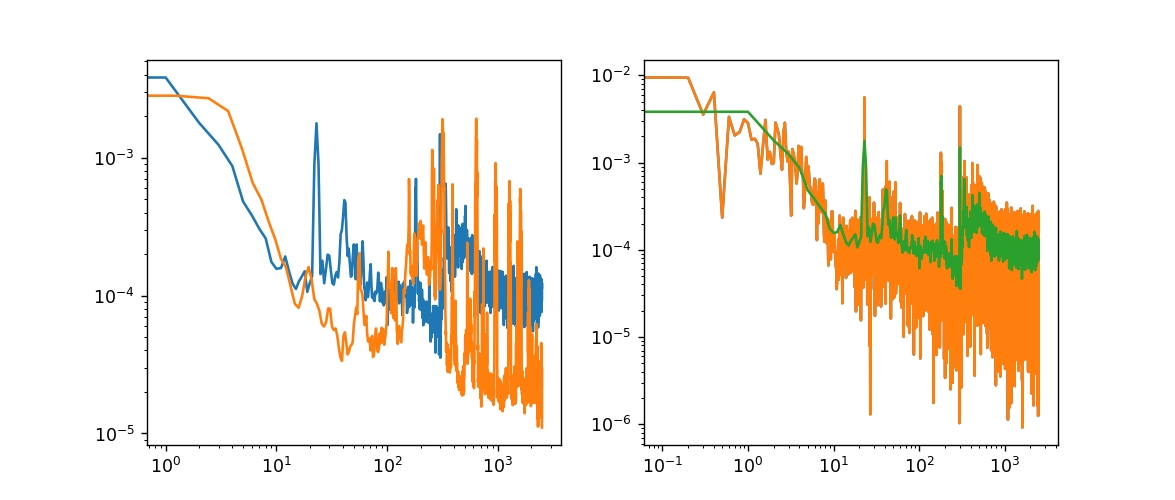

In [134]:
_,ax = plt.subplots(1,2,figsize=(9.4,4))
freq1,psd1 = bd.welch_psd('x', res= 2**14)
freq2,psd2 = bd.welch_psd('x', res= 2**12)

_ = ax[1].loglog(freqs3,np.sqrt(psd_dat3))
_ = ax[1].loglog(freqs2,cf*np.sqrt(psd_dat2))
_ = ax[1].loglog(freqs1,cf*np.sqrt(psd_dat))

_ = ax[0].loglog(freqs1,cf*np.sqrt(psd_dat))
#_ = ax[0].loglog(freqs2,scale/(0.00016347*mass)*np.sqrt(psd_dat2))

#_ = ax[0].loglog(freqs2,np.sqrt(psd_dat2))
_ = ax[0].plot(freqsht,psdht)


In [65]:
import matplotlib.pyplot as plt
plt.plot(freqsht,psdht,label = "Heterodyne paper")
plt.plot(freqs2,scale/(0.00016347*mass)*np.sqrt(psd_dat2), label = "new trap")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("F$_X$ [N/$\sqrt{Hz}$]", fontsize =24, )
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Frequency [Hz]")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(freqsht,psdht,label = "Heterodyne paper")
plt.plot(freqs2,scale/(0.00016347*mass)*np.sqrt(psd_dat2), label = "new trap")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("F$_X$ [N/$\sqrt{Hz}$]", fontsize =24, )
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Frequency [Hz]")
plt.legend()
plt.show()

In [153]:
freqsht_x,psdht_x = np.load("heterodyne_paper_results/heterodyne_x.npy")

In [155]:
freqsht_y,psdht_y = np.load("heterodyne_paper_results/heterodyne_y.npy")

In [205]:
psdht

array([2.14869367e-03, 2.81921246e-03, 2.69973678e-03, ...,
       2.51656518e-05, 2.15979801e-05, 1.10537605e-05])

In [ ]:
r'/home/data_transfer/data_from_windows/'